In [1]:
import os
from cralds_base.dataio import read_file
import sys
sys.path.append(r'../src/')
from hermes_rheo.transforms.rheo_analysis import RheoAnalysis 
from hermes_rheo.transforms.states_to_condition import StatesToCondition 
from hermes_rheo.transforms.automated_mastercurve import AutomatedMasterCurve
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = r'Q:\Projects\Rheology_OP\CRAL_hermes\damien_vadillo\SoR-2024\468MP\153 - hermes -  468mp - 0.3-60 rad_s 10pct.2024.09.16.txt'
experiment = read_file(filepath, create_composite_datasets=True)

pipeline = RheoAnalysis() 

processed_experiment = pipeline(experiment)

print(processed_experiment)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 20

Varied Conditions
-----------------
method

index	n_rep	method	Data Types	Data Types	Data Types	
0	1	Step name	Arbitrary Wave - 1	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(torque[g.cm]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
1	1	Step name	Arbitrary Wave - 2	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(torque[g.cm]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
2	1	Step name	Arbitrary Wave - 3	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(torque[g.cm]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
3	1	Step name	Arbitrary Wave - 4	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(torque[g.cm]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
4	1	Step name	Arbitrary Wav

In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt


#Choose the step to analyze
step = 10


#Extract wave data from frquency space)
aw1_fft = processed_experiment[step][0].datasets[0]
aw1_fft.switch_coordinates('angular frequency', 'fourier_transform_strain')
f = copy.deepcopy(aw1_fft.x_values)
strain = copy.deepcopy(aw1_fft.y_values)
aw1_fft.switch_coordinates('angular frequency', 'fourier_transform_stress')
stress = copy.deepcopy(aw1_fft.y_values)

#Extract wave data from time space
original_aw1 = processed_experiment[step][0].datasets[1]
original_aw1.switch_coordinates('step time', 'strain filtered')
time = copy.deepcopy(original_aw1.x_values)
original_strain = copy.deepcopy(original_aw1.y_values)
original_aw1.switch_coordinates('step time', 'stress filtered')
original_stress = copy.deepcopy(original_aw1.y_values)

real_strain = np.real(strain)
real_stress = np.real(stress)
img_strain = np.imag(strain)
img_stress = np.imag(stress)
abs_strain = np.abs(strain)
abs_stress = np.abs(stress)

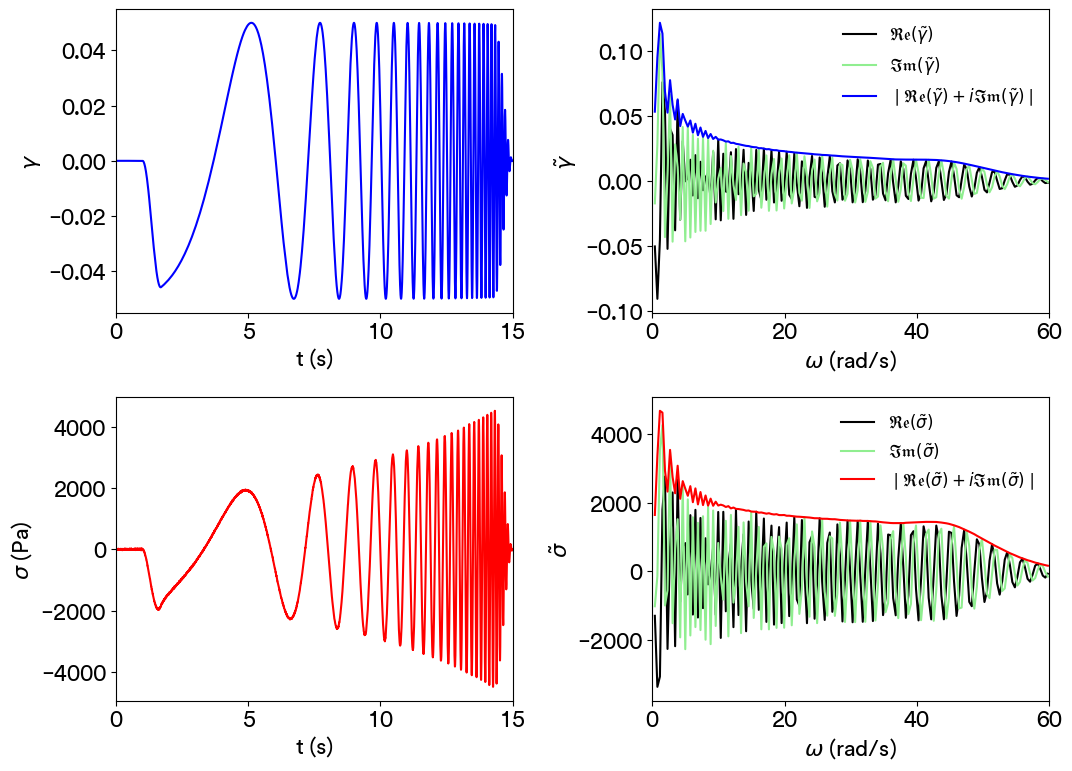

In [4]:
# Creating a 2x2 plot
# Setting the font to Arial globally
plt.rcParams.update({'font.family': '3M Circular TT', 'font.size': 16})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 8))

# Color definitions
strain_color = 'blue'
stress_color = 'red'
real_color_strain = 'black'
img_color_strain = 'lightgreen'
real_color_stress = 'black'
img_color_stress = 'lightgreen'

# Top-left plot: Original Strain vs Time
ax1.plot(time, original_strain, strain_color, label='Original Strain')
#ax1.set_title('Strain vs Time')
ax1.set_xlabel('t (s)')
ax1.set_ylabel(r'$\gamma$')
ax1.set_xlim(0, 15)
#ax1.grid(True)

# Top-right plot: Real, Imaginary, and Absolute Strain vs Frequency
ax2.plot(f, real_strain, real_color_strain, label='$\mathfrak{Re}(\\tilde\gamma)$')
ax2.plot(f, img_strain, img_color_strain, label='$\mathfrak{Im}(\\tilde\gamma)$')
ax2.plot(f, abs_strain, 'blue', label='$\mid\mathfrak{Re} (\\tilde\gamma) + i\mathfrak{Im}(\\tilde\gamma)\mid$')  # Purple as a mix of blue and green
#ax2.set_title('Strain vs Frequency')
ax2.set_xlabel('$\omega$ (rad/s)')
ax2.set_ylabel(r'$\tilde\gamma$')
ax2.set_xlim(0, 60)
#ax2.grid(True)
legend2 = ax2.legend(fontsize=12)
legend2.get_frame().set_edgecolor('white')

# Bottom-left plot: Original Stress vs Time
ax3.plot(time, original_stress, stress_color, label='Original Stress')
ax3.set_xlabel('t (s)')
ax3.set_ylabel(r'$\sigma$ (Pa)')
ax3.set_xlim(0, 15)
#ax3.grid(True)

# Bottom-right plot: Real, Imaginary, and Absolute Stress vs Frequency
ax4.plot(f, real_stress, real_color_stress, label='$\mathfrak{Re}(\\tilde\sigma)$')
ax4.plot(f, img_stress, img_color_stress, label='$\mathfrak{Im}(\\tilde\sigma)$')
ax4.plot(f, abs_stress, 'red', label='$\mid\mathfrak{Re} (\\tilde\sigma) + i\mathfrak{Im}(\\tilde\sigma)\mid$')  # Gold as a distinct mix
#ax4.set_title('Stress vs Frequency')
ax4.set_xlabel('$\omega$ (rad/s)')
ax4.set_ylabel(r'$\tilde\sigma$')
ax4.set_xlim(0, 60)
#ax4.grid(True)
legend4 = ax4.legend(fontsize=12)
legend4.get_frame().set_edgecolor('white')

plt.tight_layout()
plt.show()
